In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Air Quality Dataset

In [113]:
air_quality_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\Air Quality Index.csv')
air_quality_df.head()


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [114]:
# Checking Datatypes
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18121 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18121 non-null  object
 1   Country    18121 non-null  object
 2   Status     18121 non-null  object
 3   AQI Value  18121 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 566.4+ KB


In [115]:
# Calculate Summary statistics
air_quality_df.describe()

,AQI Value
count,18121.000000
mean,63.708515
std,50.174970
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


In [116]:
# Checking missing values
air_quality_df.isnull().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

- No missing values

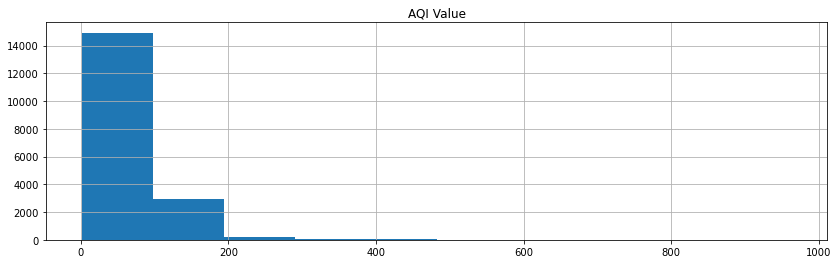

In [117]:
# Visualize distributions
air_quality_df.hist(figsize=(14, 4))
plt.show()

### Co2 by source industry all countries

In [118]:
Co2_by_source_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\co2-by-source industry all countries.csv')
Co2_by_source_df.head()

,Entity,Code,Year,Annual CO₂ emissions from other industry,Annual CO₂ emissions from flaring,Annual CO₂ emissions from cement,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal
0,Afghanistan,AFG,1970,NaN,297436.0,47350.0,216651.0,671986.0,436974.0
1,Afghanistan,AFG,1971,NaN,304112.0,43234.0,439680.0,747456.0,359072.0
2,Afghanistan,AFG,1972,NaN,366400.0,46427.0,300448.0,626544.0,190528.0
3,Afghanistan,AFG,1973,NaN,223005.0,67106.0,332680.0,701918.0,310745.0
4,Afghanistan,AFG,1974,NaN,367102.0,70301.0,400141.0,770914.0,304695.0


In [119]:
Co2_by_source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34762 entries, 0 to 34761
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    34762 non-null  object 
 1   Code                                      29748 non-null  object 
 2   Year                                      34762 non-null  int64  
 3   Annual CO₂ emissions from other industry  3202 non-null   float64
 4   Annual CO₂ emissions from flaring         15952 non-null  float64
 5   Annual CO₂ emissions from cement          28863 non-null  float64
 6   Annual CO₂ emissions from gas             18014 non-null  float64
 7   Annual CO₂ emissions from oil             25218 non-null  float64
 8   Annual CO₂ emissions from coal            21755 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB


### Data Cleaning

In [120]:
Co2_by_source_df = Co2_by_source_df.drop('Annual CO₂ emissions from other industry',axis=1)

In [121]:
# Replace missing values by mean

Co2_by_source_df['Code'].fillna(Co2_by_source_df['Code'].mode()[0],inplace=True)
Co2_by_source_df['Annual CO₂ emissions from flaring'].fillna(Co2_by_source_df['Annual CO₂ emissions from flaring'].mean(), inplace=True)
Co2_by_source_df['Annual CO₂ emissions from cement'].fillna(Co2_by_source_df['Annual CO₂ emissions from cement'].median(),inplace=True)
Co2_by_source_df['Annual CO₂ emissions from gas'].fillna(Co2_by_source_df['Annual CO₂ emissions from gas'].median(),inplace=True)
Co2_by_source_df['Annual CO₂ emissions from oil'].fillna(Co2_by_source_df['Annual CO₂ emissions from oil'].median(),inplace=True)
Co2_by_source_df['Annual CO₂ emissions from coal'].fillna(Co2_by_source_df['Annual CO₂ emissions from coal'].median(),inplace=True)

In [122]:
Co2_by_source_df.isnull().sum()

Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions from flaring    0
Annual CO₂ emissions from cement     0
Annual CO₂ emissions from gas        0
Annual CO₂ emissions from oil        0
Annual CO₂ emissions from coal       0
dtype: int64

### Co2 Emissions by sector

In [123]:
Co2_emissions_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\co2-emissions-by-sector.csv')
Co2_emissions_df.head()

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,320000.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0,20000.0


In [124]:
Co2_emissions_df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
count,6560.000000,6.421000e+03,6.305000e+03,6.557000e+03,6.421000e+03,6.421000e+03,6.421000e+03,2.270000e+03,6.421000e+03,6.421000e+03
mean,2005.500000,5.509696e+07,2.142031e+07,2.577066e+07,1.246594e+07,1.164675e+08,1.013822e+08,1.588207e+07,2.516014e+08,1.931317e+07
std,9.233796,2.525762e+08,1.187214e+08,2.464913e+08,5.762671e+07,5.786553e+08,5.153394e+08,4.129882e+07,1.216841e+09,9.489783e+07
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,8.000000e+04,0.000000e+00,-6.700000e+05,0.000000e+00,5.800000e+05,1.600000e+05,4.800000e+05,2.100000e+05,6.000000e+04
50%,2005.500000,6.400000e+05,4.800000e+05,3.000000e+04,2.400000e+05,3.170000e+06,1.500000e+06,2.400000e+06,3.980000e+06,5.500000e+05
75%,2013.250000,7.500000e+06,2.990000e+06,9.940000e+06,2.060000e+06,1.841000e+07,1.338000e+07,6.890000e+06,3.398000e+07,3.200000e+06
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09


In [125]:
Co2_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        6560 non-null   object 
 1   Code                                                          6208 non-null   object 
 2   Year                                                          6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                       6421 non-null   float64
 4   Carbon dioxide emissions from industry                        6305 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    6557 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion           6421 non-null   float64
 7   Carbon dioxide emissions from transport                       6421 no

#### Data Cleaning

In [126]:
Co2_emissions_df = Co2_emissions_df.drop(['Fugitive emissions of carbon dioxide from energy production'],axis=1)

In [127]:
Co2_emissions_df['Code'].fillna(Co2_emissions_df['Code'].mode()[0],inplace=True)
Co2_emissions_df['Carbon dioxide emissions from buildings'].fillna(Co2_emissions_df['Carbon dioxide emissions from buildings'].median(),inplace=True)
Co2_emissions_df['Carbon dioxide emissions from industry'].fillna(Co2_emissions_df['Carbon dioxide emissions from industry'].median(),inplace=True)
Co2_emissions_df['Carbon dioxide emissions from land use change and forestry'].fillna(Co2_emissions_df['Carbon dioxide emissions from land use change and forestry'].median(),inplace=True)
Co2_emissions_df['Carbon dioxide emissions from other fuel combustion'].fillna(Co2_emissions_df['Carbon dioxide emissions from other fuel combustion'].median(),inplace=True)
Co2_emissions_df['Carbon dioxide emissions from transport'].fillna(Co2_emissions_df['Carbon dioxide emissions from transport'].median(), inplace=True)
Co2_emissions_df['Carbon dioxide emissions from manufacturing and construction'].fillna(Co2_emissions_df['Carbon dioxide emissions from manufacturing and construction'].median(),inplace=True)
Co2_emissions_df['Carbon dioxide emissions from electricity and heat'].fillna(Co2_emissions_df['Carbon dioxide emissions from electricity and heat'].median(),inplace=True)
Co2_emissions_df['Carbon dioxide emissions from bunker fuels'].fillna(Co2_emissions_df['Carbon dioxide emissions from bunker fuels'].median(),inplace=True)

In [128]:
Co2_emissions_df.isnull().sum()

Entity                                                          0
Code                                                            0
Year                                                            0
Carbon dioxide emissions from buildings                         0
Carbon dioxide emissions from industry                          0
Carbon dioxide emissions from land use change and forestry      0
Carbon dioxide emissions from other fuel combustion             0
Carbon dioxide emissions from transport                         0
Carbon dioxide emissions from manufacturing and construction    0
Carbon dioxide emissions from electricity and heat              0
Carbon dioxide emissions from bunker fuels                      0
dtype: int64

### Global sea level

In [129]:
global_sea_level_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\Global_sea_level_rise.csv')
global_sea_level_df.head()

,year,date,mmfrom1993-2008average
0,1880,07/15/1880,-183.247396
1,1881,07/15/1881,-174.014062
2,1882,07/15/1882,-190.080729
3,1883,07/15/1883,-185.147396
4,1884,07/15/1884,-166.280729


In [130]:
global_sea_level_df.describe()

,year,mmfrom1993-2008average
count,143.00000,143.000000
mean,1951.00000,-79.729820
std,41.42463,69.902279
min,1880.00000,-190.080729
25%,1915.50000,-138.397396
50%,1951.00000,-87.447396
75%,1986.50000,-25.564062
max,2022.00000,69.660000


In [131]:
global_sea_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    143 non-null    int64  
 1   date                    143 non-null    object 
 2   mmfrom1993-2008average  143 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB


- No missing values

### Green house gas emissions by sector

In [132]:
green_hs_gas_emmisssions_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\green house gas-emissions-by-sector.csv')
green_hs_gas_emmisssions_df.head()

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,970000.0,320000.0,280000.0,0.0,20000.0
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.0
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.0
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.0
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.0


In [133]:
green_hs_gas_emmisssions_df.describe()

,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
count,6560.000000,6.557000e+03,6.557000e+03,6.496000e+03,6.421000e+03,6.560000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.496000e+03,6.421000e+03,6.421000e+03
mean,2005.500000,1.060862e+08,3.095737e+07,2.997569e+07,6.066295e+07,3.869813e+07,1.020892e+08,1.196178e+08,2.526939e+08,5.400387e+07,1.271678e+07,1.949380e+07
std,9.233796,4.608388e+08,2.632920e+08,1.326395e+08,2.740674e+08,2.014247e+08,5.187271e+08,5.939497e+08,1.222167e+09,2.511666e+08,5.882962e+07,9.578905e+07
min,1990.000000,0.000000e+00,-1.628370e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,9.900000e+05,-6.700000e+05,4.000000e+05,1.300000e+05,1.100000e+05,1.800000e+05,6.000000e+05,2.100000e+05,0.000000e+00,0.000000e+00,6.000000e+04
50%,2005.500000,6.990000e+06,6.000000e+04,1.870000e+06,1.430000e+06,9.300000e+05,1.520000e+06,3.250000e+06,4.010000e+06,3.200000e+05,2.600000e+05,5.600000e+05
75%,2013.250000,2.744000e+07,1.064000e+07,7.390000e+06,8.920000e+06,5.550000e+06,1.351000e+07,1.892000e+07,3.409000e+07,8.487500e+06,2.090000e+06,3.230000e+06
max,2021.000000,5.864000e+09,2.796530e+09,1.677360e+09,3.091260e+09,3.260350e+09,6.472360e+09,8.493200e+09,1.630219e+10,3.336260e+09,7.686300e+08,1.338160e+09


In [134]:
green_hs_gas_emmisssions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6560 non-null   object 
 1   Code                                                           6208 non-null   object 
 2   Year                                                           6560 non-null   int64  
 3   Greenhouse gas emissions from agriculture                      6557 non-null   float64
 4   Greenhouse gas emissions from land use change and forestry     6557 non-null   float64
 5   Greenhouse gas emissions from waste                            6496 non-null   float64
 6   Greenhouse gas emissions from buildings                        6421 non-null   float64
 7   Greenhouse gas emissions from industry                      

In [135]:
green_hs_gas_emmisssions_df['Code'].fillna(green_hs_gas_emmisssions_df['Code'].mode()[0],inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from agriculture'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from agriculture'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from land use change and forestry'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from land use change and forestry'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from waste'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from waste'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from buildings'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from buildings'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from industry'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from industry'].median(), inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from manufacturing and construction'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from manufacturing and construction'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from transport'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from transport'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from electricity and heat'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from electricity and heat'].median(),inplace=True)
green_hs_gas_emmisssions_df['Fugitive emissions of greenhouse gases from energy production'].fillna(green_hs_gas_emmisssions_df['Fugitive emissions of greenhouse gases from energy production'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from other fuel combustion'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from other fuel combustion'].median(),inplace=True)
green_hs_gas_emmisssions_df['Greenhouse gas emissions from bunker fuels'].fillna(green_hs_gas_emmisssions_df['Greenhouse gas emissions from bunker fuels'].median(),inplace=True)

In [136]:
green_hs_gas_emmisssions_df.isnull().sum()

Entity                                                           0
Code                                                             0
Year                                                             0
Greenhouse gas emissions from agriculture                        0
Greenhouse gas emissions from land use change and forestry       0
Greenhouse gas emissions from waste                              0
Greenhouse gas emissions from buildings                          0
Greenhouse gas emissions from industry                           0
Greenhouse gas emissions from manufacturing and construction     0
Greenhouse gas emissions from transport                          0
Greenhouse gas emissions from electricity and heat               0
Fugitive emissions of greenhouse gases from energy production    0
Greenhouse gas emissions from other fuel combustion              0
Greenhouse gas emissions from bunker fuels                       0
dtype: int64

### Per Capita Co2 vs average

In [137]:
per_capita_co2_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\per-capita-co2-vs-average.csv')
per_capita_co2_df.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123


In [138]:
per_capita_co2_df.describe()

,Year,Annual CO₂ emissions (per capita)
count,26182.000000,26182.000000
mean,1952.841074,3.815395
std,53.168164,14.383452
min,1750.000000,0.000000
25%,1919.000000,0.169388
50%,1965.000000,1.013228
75%,1995.000000,4.296536
max,2023.000000,782.682070


In [139]:
per_capita_co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26182 non-null  object 
 1   Code                               22895 non-null  object 
 2   Year                               26182 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26182 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 818.3+ KB


In [140]:
per_capita_co2_df['Code'] = per_capita_co2_df['Code'].fillna(per_capita_co2_df['Code'].mode()[0])

In [141]:
per_capita_co2_df.isnull().sum()

Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64

### Total GreenHouse gas emissions

In [142]:
total_greenh_gas_emm_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\total-greenhouse gas-emissions.csv')
total_greenh_gas_emm_df.head()

,Entity,Code,Year,Annual greenhouse gas emissions in CO₂ equivalents
0,Afghanistan,AFG,1850,7435743.5
1,Afghanistan,AFG,1851,7499858.5
2,Afghanistan,AFG,1852,7560495.5
3,Afghanistan,AFG,1853,7619898.0
4,Afghanistan,AFG,1854,7678120.0


In [143]:
total_greenh_gas_emm_df.describe()

,Year,Annual greenhouse gas emissions in CO₂ equivalents
count,37410.000000,3.741000e+04
mean,1936.500000,4.885422e+08
std,50.229315,2.392580e+09
min,1850.000000,-1.496139e+07
25%,1893.000000,1.835210e+06
50%,1936.500000,1.500753e+07
75%,1980.000000,7.824313e+07
max,2023.000000,5.381685e+10


In [144]:
total_greenh_gas_emm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              37410 non-null  object 
 1   Code                                                34278 non-null  object 
 2   Year                                                37410 non-null  int64  
 3   Annual greenhouse gas emissions in CO₂ equivalents  37410 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [145]:
total_greenh_gas_emm_df['Code'] = total_greenh_gas_emm_df['Code'].fillna(total_greenh_gas_emm_df['Code'].mode()[0])

In [146]:
total_greenh_gas_emm_df.isnull().sum()

Entity                                                0
Code                                                  0
Year                                                  0
Annual greenhouse gas emissions in CO₂ equivalents    0
dtype: int64